In [32]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle  # To load the saved model
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

file = "updated_pollution_dataset.csv"
data = pd.read_csv(file)

In [33]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [34]:
data.shape

(5000, 10)

In [35]:
import numpy as np
import pandas as pd
from scipy import stats

# Ensure data is a DataFrame
data = pd.DataFrame(data)  # If not already a DataFrame

# Select only numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Compute Z-scores
z_scores = np.abs(stats.zscore(numeric_cols))

# Identify Outliers (Threshold = 3)
outliers = np.where(z_scores > 3)

print("Outliers detected at:", outliers)


Outliers detected at: (array([  29,   29,   39,   50,   53,   53,   62,   67,  107,  108,  114,
        114,  114,  146,  146,  151,  151,  176,  178,  180,  180,  180,
        231,  231,  232,  249,  282,  294,  298,  298,  313,  345,  348,
        348,  375,  375,  391,  391,  404,  404,  477,  509,  525,  525,
        545,  549,  560,  560,  571,  571,  571,  605,  605,  631,  667,
        667,  670,  706,  754,  768,  768,  787,  787,  806,  806,  806,
        826,  829,  834,  860,  860,  869,  869,  882,  882,  968,  981,
        981, 1014, 1014, 1053, 1053, 1069, 1095, 1095, 1114, 1116, 1116,
       1132, 1132, 1168, 1215, 1219, 1219, 1272, 1303, 1303, 1330, 1330,
       1336, 1407, 1407, 1412, 1441, 1450, 1457, 1479, 1500, 1500, 1501,
       1503, 1519, 1519, 1529, 1531, 1553, 1554, 1554, 1554, 1579, 1584,
       1584, 1585, 1585, 1594, 1599, 1599, 1630, 1630, 1650, 1650, 1650,
       1682, 1724, 1724, 1766, 1815, 1844, 1844, 1845, 1854, 1854, 1855,
       1856, 1863, 1888, 188

In [36]:
print(data.dtypes)  # Shows the data type for each column
print(data.nunique())  # Shows the number of unique values for each feature


Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object
Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64


In [37]:
data.groupby('Air Quality').agg({'Temperature': ['mean', 'max', 'min']})


Temperature            
                   mean   max   min
Air Quality                        
Good           24.94655  35.4  13.4
Hazardous      40.34780  58.6  19.5
Moderate       30.14200  43.7  17.5
Poor           34.86510  56.0  18.9

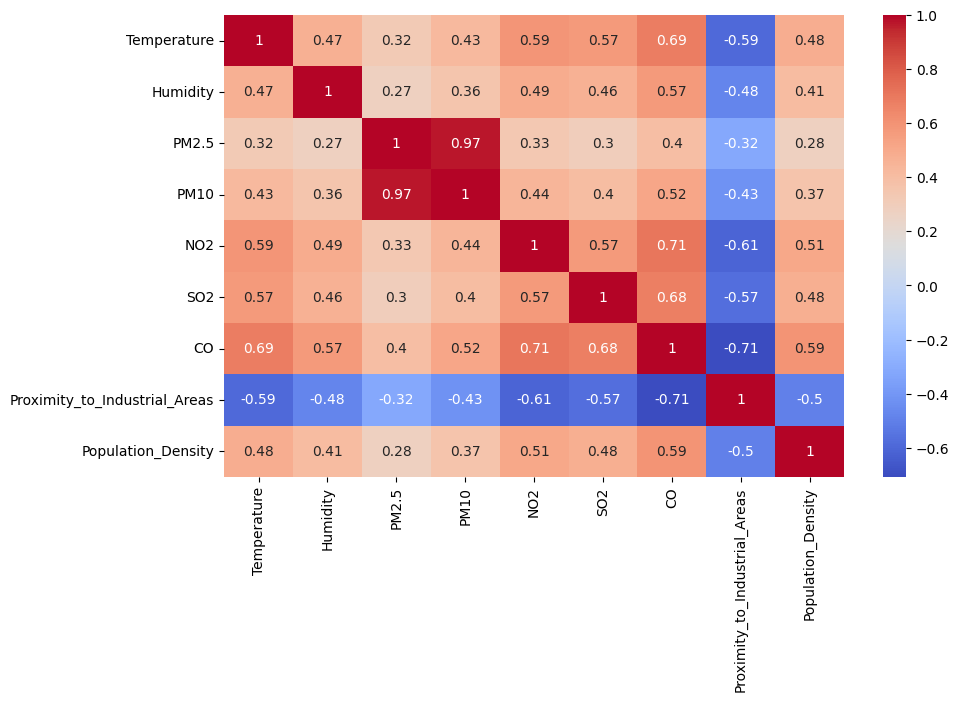

In [38]:
# Correlation Matrix
plt.figure(figsize=(10,6))
numeric_df = data.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [39]:
data.isnull().sum()  # Shows the count of missing values per column


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

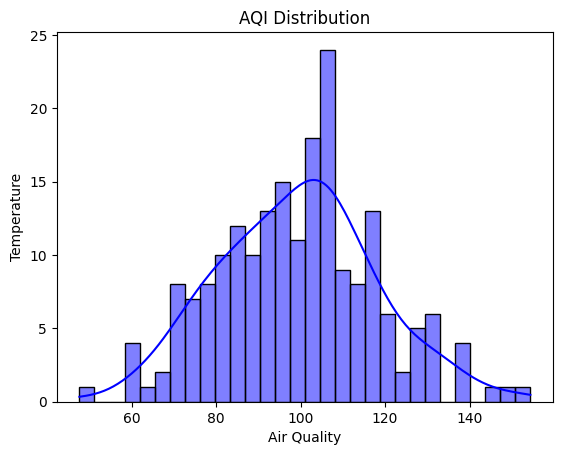

In [40]:
# Generate dummy data
np.random.seed(42)
data = pd.DataFrame({
    'Air Quality': np.random.normal(loc=100, scale=20, size=200)  # Simulating AQI values
})

# Plot histogram with density curve
sns.histplot(data['Air Quality'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Air Quality')
plt.ylabel('Temperature')
plt.title('AQI Distribution')

# Show the plot
plt.show()

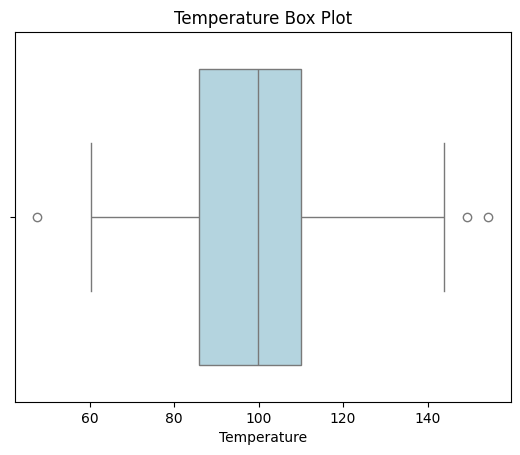

In [41]:
np.random.seed(42)
data = pd.DataFrame({
    'Temperature': np.random.normal(loc=100, scale=20, size=200)  # Simulated AQI values
})

# Create a box plot
sns.boxplot(x=data['Temperature'], color='lightblue')

# Add title and labels
plt.title('Temperature Box Plot')
plt.xlabel('Temperature')

# Show the plot
plt.show()


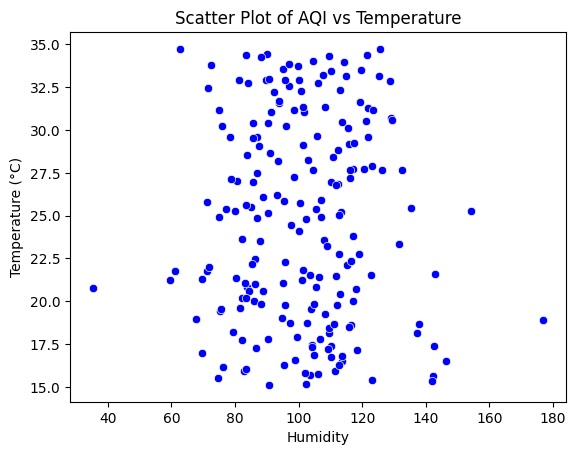

In [42]:
np.random.seed(42)
data = pd.DataFrame({
    'Temperature': np.random.uniform(15, 35, 200),  
    'Humidity': np.random.normal(loc=100, scale=20, size=200)  
})

# Create a scatter plot
sns.scatterplot(x=data['Humidity'], y=data['Temperature'], color='blue')

# Add labels and title
plt.ylabel('Temperature (°C)')
plt.xlabel('Humidity')
plt.title('Scatter Plot of AQI vs Temperature')

# Show the plot
plt.show()


In [43]:
data = pd.read_csv(file)
data = pd.DataFrame(data)  # If not already a DataFrame


In [44]:
# Preprocessing
# Filling missing values in numerical columns

num_imputer = SimpleImputer(strategy="mean")
data[data.select_dtypes(include=["float64", "int64"]).columns] = num_imputer.fit_transform(data.select_dtypes(include=["float64", "int64"]))

In [45]:
# # Preprocessing
# # Filling missing values in categorical columns

# cat_imputer = SimpleImputer(strategy="most_frequent")
# data[data.select_dtypes(include=["object"]).columns] = cat_imputer.fit_transform(data.select_dtypes(include=["object"]))

In [46]:
# Check for null values and handle them
data = data.dropna()

In [47]:
# Seperating features and target columns

X = data.drop("Air Quality", axis = 1)
y = data["Air Quality"].astype("category").cat.codes   # Label encoding

In [48]:
# Save the category labels (original labels of the 'Air Quality' column)

category_labels = data["Air Quality"].astype("category").cat.categories.tolist()
with open("categories.pkl", "wb") as f:
    pickle.dump(category_labels, f)

In [49]:
# Splitting data in training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37, stratify=y)

In [50]:
# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Output
print("Data Preprocessing Complete!")
print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

Data Preprocessing Complete!
Training Features Shape: (4000, 9)
Testing Features Shape: (1000, 9)


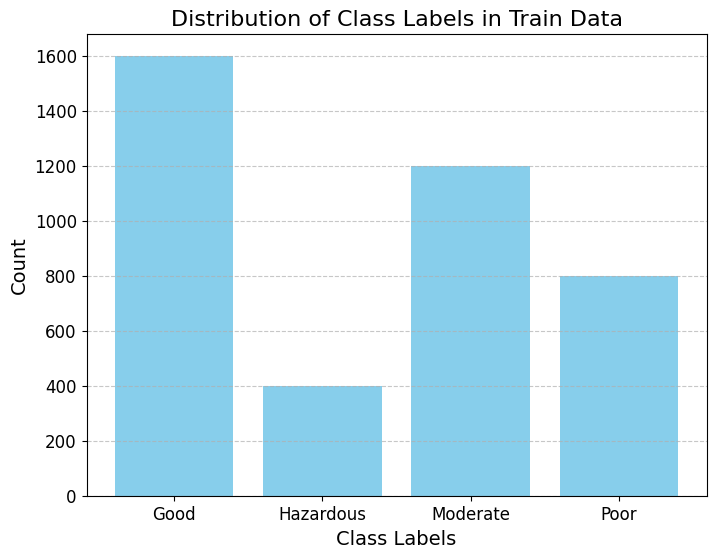

In [51]:
# Labels frequency in training data

import matplotlib.pyplot as plt
import pandas as pd

# Convert y_train to a Pandas Series for easier counting
y_train_series = pd.Series(y_train)

# Count the occurrences of each class
class_counts = y_train_series.value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(category_labels, class_counts.values, color='skyblue')
plt.xlabel('Class Labels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Class Labels in Train Data', fontsize=16)
plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [52]:
# Save the scaler object

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)
print(type(scaler))  


<class 'sklearn.preprocessing._data.StandardScaler'>


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the hyperparameter space
param_distributions = {
    'n_estimators': np.arange(100, 501, 50),  # Number of trees
    'max_depth': [None] + list(np.arange(10, 51, 10)),  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],  # Features to consider at each split
}

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=140, class_weight='balanced')

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random parameter samples
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Get best parameters and train the best model
best_rf = random_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)
print("\nTest Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': np.int64(100), 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': np.int64(40)}
Best Cross-Validation Accuracy: 0.95225

Test Set Accuracy: 0.957

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.89      0.87      0.88       100
           2       0.95      0.98      0.97       300
           3       0.91      0.88      0.89       200

    accuracy                           0.96      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.96      0.96      0.96      1000



In [54]:
# Training Random Forest model

rf_model = RandomForestClassifier(random_state=42, n_estimators=140, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=140,
                       random_state=42)

In [55]:
# Predicting Random Forest model

y_pred = rf_model.predict(X_test)

In [56]:
# Calculate Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:2f}%")

Accuracy: 95.400000%


In [57]:
# Calculate Accuracy for training data
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate Accuracy for testing data
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [58]:
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 100.00%
Testing Accuracy: 95.40%


In [59]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Assume X_train and y_train are your training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the model
with open("aqi_model.pkl", "wb") as f:
    pickle.dump(model, f)


<function matplotlib.pyplot.show(close=None, block=None)>

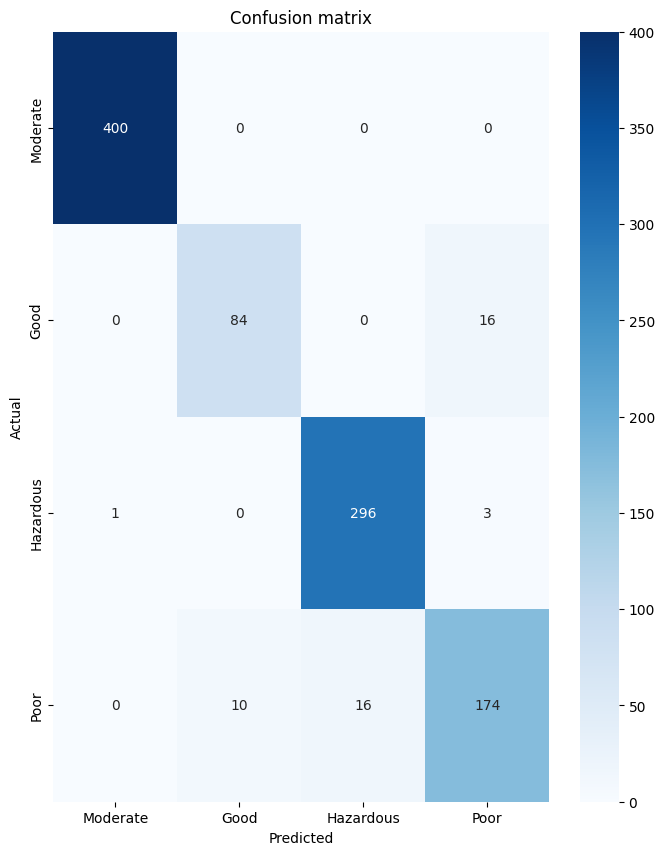

In [60]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data["Air Quality"].unique(), yticklabels=data["Air Quality"].unique())
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

In [61]:
# Calculate Feature importance

importance = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"Features": feature_names, "Importance": importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
print(importance_df)

                        Features  Importance
6                             CO    0.342092
7  Proximity_to_Industrial_Areas    0.233414
4                            NO2    0.125778
5                            SO2    0.080973
0                    Temperature    0.078644
8             Population_Density    0.051860
1                       Humidity    0.044560
3                           PM10    0.025168
2                          PM2.5    0.017510


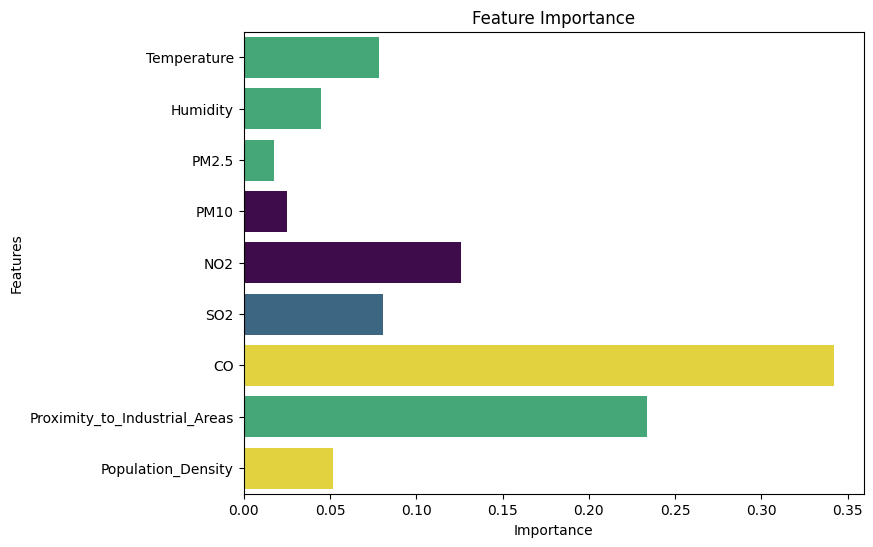

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Features', data=importance_df, hue=y, palette='viridis', legend=False)
plt.title("Feature Importance")
plt.show()

In [63]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       0.89      0.84      0.87       100
           2       0.95      0.99      0.97       300
           3       0.90      0.87      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000



In [64]:
# Save the model (optional)

joblib.dump(rf_model, 'random_forest_model.pkl')  # Save the model to a file

['random_forest_model.pkl']

In [65]:
# Implementing Decision Tree Classifier using criterion "gini"

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
print(dt_classifier.fit(X_train, y_train))

DecisionTreeClassifier(max_depth=5, random_state=42)


In [66]:
y_pred = dt_classifier.predict(X_test)
print(f"\nAccuracy Score:, {accuracy_score(y_test, y_pred)*100:2f}")


Accuracy Score:, 90.500000


<function matplotlib.pyplot.show(close=None, block=None)>

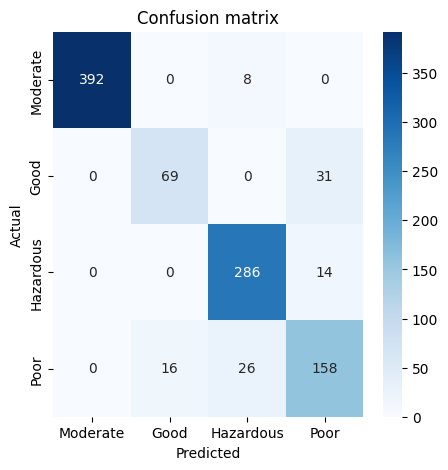

In [67]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data["Air Quality"].unique(), yticklabels=data["Air Quality"].unique())
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

In [68]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.81      0.69      0.75       100
           2       0.89      0.95      0.92       300
           3       0.78      0.79      0.78       200

    accuracy                           0.91      1000
   macro avg       0.87      0.85      0.86      1000
weighted avg       0.90      0.91      0.90      1000



In [69]:
# Implementing Decision Tree Classifier using criterion 'entropy'

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [70]:
y_pred = dt_classifier.predict(X_test)
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.894


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Iterate through depths from 1 to 5
for depth in range(1, 6):
    dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Predictions for training data
    y_train_pred = dt_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predictions for testing data
    y_test_pred = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print accuracies
    print(f"Depth: {depth}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%\n")


Depth: 1
Training Accuracy: 67.25%
Testing Accuracy: 67.10%

Depth: 2
Training Accuracy: 82.47%
Testing Accuracy: 82.40%

Depth: 3
Training Accuracy: 89.28%
Testing Accuracy: 87.40%

Depth: 4
Training Accuracy: 91.42%
Testing Accuracy: 88.70%

Depth: 5
Training Accuracy: 91.97%
Testing Accuracy: 89.40%



<function matplotlib.pyplot.show(close=None, block=None)>

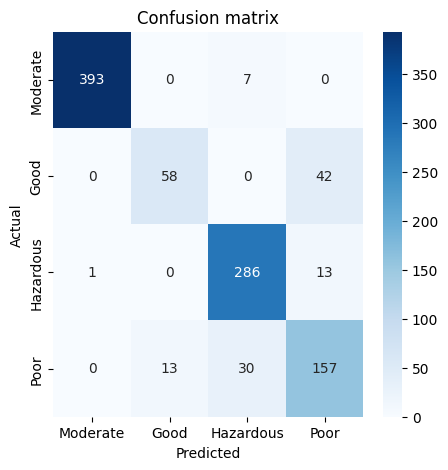

In [72]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data["Air Quality"].unique(), yticklabels=data["Air Quality"].unique())
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

In [73]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.82      0.58      0.68       100
           2       0.89      0.95      0.92       300
           3       0.74      0.79      0.76       200

    accuracy                           0.89      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.89      0.89      0.89      1000



In [74]:
# Implementing Decision Tree Classifier using criterion "gini"

dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
print(dt_classifier.fit(X_train, y_train))

DecisionTreeClassifier(max_depth=5, random_state=42)


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Iterate through depths from 1 to 5
for depth in range(1, 6):
    dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Predictions for training data
    y_train_pred = dt_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predictions for testing data
    y_test_pred = dt_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print accuracies
    print(f"Depth: {depth}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Testing Accuracy: {test_accuracy * 100:.2f}%\n")


Depth: 1
Training Accuracy: 67.33%
Testing Accuracy: 67.60%

Depth: 2
Training Accuracy: 82.25%
Testing Accuracy: 82.50%

Depth: 3
Training Accuracy: 89.18%
Testing Accuracy: 88.30%

Depth: 4
Training Accuracy: 91.70%
Testing Accuracy: 90.40%

Depth: 5
Training Accuracy: 92.15%
Testing Accuracy: 90.50%



<function matplotlib.pyplot.show(close=None, block=None)>

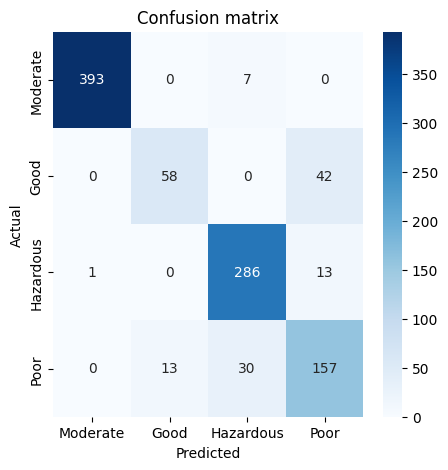

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data["Air Quality"].unique(), yticklabels=data["Air Quality"].unique())
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show

Class Distribution in Training Data:
0    1600
2    1200
3     800
1     400
Name: count, dtype: int64


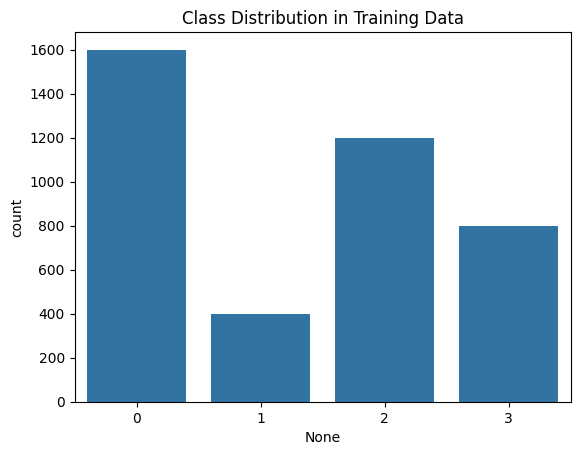

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Check the distribution of classes in your training set
class_distribution = pd.Series(y_train).value_counts()
print("Class Distribution in Training Data:")
print(class_distribution)

# Visualize the class distribution
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Data')
plt.show()


In [78]:
import pickle
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load your dataset (make sure it's loaded correctly before training)
# X_train, X_test, y_train, y_test = your_data_loading_function()

# Example of how to apply class weighting in RandomForestClassifier:
class_weights = {0: 1.0, 1: 2.0, 2: 1.0, 3: 2.0}  # Example weights for your classes

# Train the model with class weighting
model = RandomForestClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    
# Load the model, scaler, and category labels
model_path = 'random_forest_model.pkl'
scaler_path = 'scaler.pkl'
categories_path = 'categories.pkl'

try:
    # Load the trained model, scaler, and category labels
    with open(model_path, 'rb') as model_file:
        model = pickle.load(model_file)

    with open(scaler_path, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    with open(categories_path, 'rb') as categories_file:
        category_labels = pickle.load(categories_file)

except FileNotFoundError as e:
    print(f"File not found: {e}")
    exit()
except Exception as e:
    print(f"Error loading files: {e}")
    exit()

# Function to predict air quality
def predict_air_quality():
    print("Enter values for the following features:")

    try:
        # Input features
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        pm2_5 = float(input("PM2.5 (µg/m³): "))
        pm10 = float(input("PM10 (µg/m³): "))
        no2 = float(input("NO2 (µg/m³): "))
        so2 = float(input("SO2 (µg/m³): "))
        co = float(input("CO (µg/m³): "))
        proximity_to_industrial_areas = float(input("Proximity to Industrial Areas (0 or 1): "))
        population_density = int(input("Population Density (people/km²): "))

        # Combine the inputs into a single array
        input_features = np.array([[temperature, humidity, pm2_5, pm10, no2, so2, co, proximity_to_industrial_areas, population_density]])
        
        # Scale the input features using the trained scaler
        scaled_features = scaler.transform(input_features)

        # Make prediction using the trained model
        prediction = model.predict(scaled_features)
        predicted_class_index = prediction[0]
        predicted_category = category_labels[predicted_class_index]

        # Get the predicted class probabilities
        predicted_probabilities = model.predict_proba(scaled_features)[0]
        print(f"Prediction Probabilities: {predicted_probabilities}")

        # Display the class with highest probability
        max_prob_value = np.max(predicted_probabilities)
        print(f"Predicted Class Probability: {max_prob_value}")

        # If the model is overly confident about one class (e.g., > 0.8), raise a flag
        if max_prob_value > 0.8:
            print("Warning: Model is overly confident in this prediction, which might indicate bias or class imbalance.")

        print(f"Predicted Air Quality: {predicted_category}")

    except ValueError as e:
        print(f"Invalid input: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the prediction function
if __name__ == "__main__":
    predict_air_quality()



# 39.4	96.6	14.6	35.5	42.9	17.9	1.82	3.1	674

# 26.3	65.7	1.3	5.5	18.3	5.9	0.85	13	529


Enter values for the following features:
Prediction Probabilities: [0.   0.78 0.   0.22]
Predicted Class Probability: 0.78
Predicted Air Quality: Hazardous


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [79]:
# Save the model (optional)

joblib.dump(dt_classifier, 'decision_tree.pkl')  # Save the model to a file

['decision_tree.pkl']

In [80]:
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

# Example of class weights, adjust according to your dataset
class_weights = {0: 1.0, 1: 3.0, 2: 3.0, 3: 3.0}  # Manually adjusting weights for minority classes

# Train the model with class weighting
model = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the trained model, scaler, and category labels
with open("decision_tree.pkl", "wb") as file:
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

with open("categories.pkl", "wb") as file:
    pickle.dump(category_labels, file)

# Load the trained model and other necessary files
decision_tree_model_path = "decision_tree.pkl"
scaler_path = "scaler.pkl"
categories_path = "categories.pkl"

try:
    with open(decision_tree_model_path, 'rb') as model_file:
        model = pickle.load(model_file)

    with open(scaler_path, 'rb') as scaler_file:
        scaler = pickle.load(scaler_file)

    with open(categories_path, 'rb') as categories_file:
        category_labels = pickle.load(categories_file)

except FileNotFoundError as e:
    print(f"File not found: {e}")
    exit()

# Verify that model and scaler are correctly loaded
if not hasattr(model, "predict"):
    raise AttributeError("Loaded object is not a valid model with a 'predict' method.")
if not hasattr(scaler, "transform"):
    raise AttributeError("Loaded object is not a valid scaler with a 'transform' method.")
if not isinstance(category_labels, list):
    raise AttributeError("Category labels are not loaded properly.")

# Define the real-time input function
def predict_air_quality():
    print("Enter the values for the features:")
    
    try:
        # Take input for each feature
        temperature = float(input("Temperature (°C): "))
        humidity = float(input("Humidity (%): "))
        pm2_5 = float(input("PM2.5 (µg/m³): "))
        pm10 = float(input("PM10 (µg/m³): "))
        no2 = float(input("NO2 (µg/m³): "))
        so2 = float(input("SO2 (µg/m³): "))
        co = float(input("CO (µg/m³): "))
        proximity_to_industrial_areas = float(input("Proximity to Industrial Areas (0 or 1): "))
        population_density = float(input("Population Density (people/km²): "))

        # Combine inputs into a single array
        input_features = np.array([[temperature, humidity, pm2_5, pm10, no2, so2, co,
                                     proximity_to_industrial_areas, population_density]])

        # Print the input features for debugging
        print("\nInput Features:", input_features)

        # Scale the features using the saved scaler
        scaled_features = scaler.transform(input_features)

        # Print scaled features for debugging
        print("Scaled Features:", scaled_features)

        # Predict using the loaded model
        prediction = model.predict(scaled_features)

        # Convert the numeric prediction to the original categorical label
        predicted_category = category_labels[prediction[0]]

        print(f"\nPredicted Air Quality: {predicted_category}")
    
    except ValueError as e:
        print(f"Invalid input: {e}")
    except Exception as e:
        print(f"An error occurred during prediction: {e}")

# Run the function
if __name__ == "__main__":
    predict_air_quality()


Enter the values for the features:
Invalid input: could not convert string to float: ''
